# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=50000)
data.shape

y_value_counts = data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding:     ", y_value_counts[1]," -> ",round(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0])*100,2),"%")
print("Number of projects thar are not approved for funding: ", y_value_counts[0]," -> ",round(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0])*100,2),"%")

Number of projects thar are approved for funding:      41993  ->  83.99 %
Number of projects thar are not approved for funding:  8007  ->  16.01 %


In [2]:
## taking random samples of 50k datapoints
#project_data = project_bkp.sample(n = 100000) 
# resource_data = pd.read_csv('../resources.csv')

#project_data.shape

# y_value_counts = row1['project_is_approved'].value_counts()
#y_value_counts = project_data['project_is_approved'].value_counts()
#print("Number of projects thar are approved for funding:     ", y_value_counts[1]," -> ",round(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0])*100,2),"%")
#print("Number of projects thar are not approved for funding: ", y_value_counts[0]," -> ",round(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0])*100,2),"%")

# PRE-PROCESSING

In [3]:
catogories = list(data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
data['clean_categories'] = cat_list
data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print("done")

KeyError: 'project_subject_categories'

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [15]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


In [171]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42, stratify=y)



print("x_train: ",X_train.shape)
print("x_test : ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test : ",y_test.shape)


x_train:  (33500, 8)
x_test :  (16500, 8)
y_train:  (33500,)
y_test :  (16500,)


In [212]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

# VECTORIZING CATEGORICAL DATA

In [213]:
# Vectorizing Categorical data: Clean Subject Categories
'''from sklearn.feature_extraction.text import CountVectorizer

vectorizer_sub_sub = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_sub_sub.fit(x_train['clean_subcategories'].values)

x_train_sub_categories_one_hot = vectorizer_sub_sub.transform(x_train['clean_subcategories'].values)
# x_cv_sub_categories_one_hot    = vectorizer_sub_sub.transform(x_cv['clean_subcategories'].values)
x_test_sub_categories_one_hot  = vectorizer_sub_sub.transform(x_test['clean_subcategories'].values)

print(vectorizer_sub_sub.get_feature_names())

print("Shape of matrix after one hot encoding -> sub_categories: x_train: ",x_train_sub_categories_one_hot.shape)
# print("Shape of matrix after one hot encoding -> sub_categories: x_cv   : ",x_cv_sub_categories_one_hot.shape)
print("Shape of matrix after one hot encoding -> sub_categories: x_test : ",x_test_sub_categories_one_hot.shape)'''

'from sklearn.feature_extraction.text import CountVectorizer\n\nvectorizer_sub_sub = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)\n\nvectorizer_sub_sub.fit(x_train[\'clean_subcategories\'].values)\n\nx_train_sub_categories_one_hot = vectorizer_sub_sub.transform(x_train[\'clean_subcategories\'].values)\n# x_cv_sub_categories_one_hot    = vectorizer_sub_sub.transform(x_cv[\'clean_subcategories\'].values)\nx_test_sub_categories_one_hot  = vectorizer_sub_sub.transform(x_test[\'clean_subcategories\'].values)\n\nprint(vectorizer_sub_sub.get_feature_names())\n\nprint("Shape of matrix after one hot encoding -> sub_categories: x_train: ",x_train_sub_categories_one_hot.shape)\n# print("Shape of matrix after one hot encoding -> sub_categories: x_cv   : ",x_cv_sub_categories_one_hot.shape)\nprint("Shape of matrix after one hot encoding -> sub_categories: x_test : ",x_test_sub_categories_one_hot.shape)'

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [214]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [215]:
#Bow for essay

vectorizer_essay_bow = CountVectorizer(min_df=10)

vectorizer_essay_bow.fit(X_train['essay'])

X_train_essay_bow = vectorizer_essay_bow.transform(X_train['essay'])
X_cv_essay_bow    = vectorizer_essay_bow.transform(X_cv['essay'])
X_test_essay_bow  = vectorizer_essay_bow.transform(X_test['essay'])

print("Shape of matrix after BOW -> Essays: x_train: ",X_train_essay_bow.shape)
print("Shape of matrix after BOW -> Essays: x_cv   : ",X_cv_essay_bow.shape)
print("Shape of matrix after BOW -> Essays: x_test : ",X_test_essay_bow.shape)

Shape of matrix after BOW -> Essays: x_train:  (15038, 7426)
Shape of matrix after BOW -> Essays: x_cv   :  (7407, 7426)
Shape of matrix after BOW -> Essays: x_test :  (16500, 7426)


In [177]:
#Bow for title
vectorizer_title_bow = CountVectorizer(min_df=10)

vectorizer_title_bow.fit(x_train['preprocessed_titles'])

x_train_titles_bow = vectorizer_title_bow.transform(x_train['preprocessed_titles'])
# x_cv_titles_bow    = vectorizer_title_bow.transform(x_cv['preprocessed_titles'])
x_test_titles_bow  = vectorizer_title_bow.transform(x_test['preprocessed_titles'])

print("Shape of matrix after BOW -> Title: x_train: ",x_train_titles_bow.shape)
# print("Shape of matrix after BOW -> Title: x_cv   : ",x_cv_titles_bow.shape)
print("Shape of matrix after BOW -> Title: x_test : ",x_test_titles_bow.shape)

KeyError: 'preprocessed_titles'

In [216]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)

vectorizer_essay_tfidf.fit(X_train['essay'])

X_train_essays_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'])
X_cv_essays_tfidf    = vectorizer_essay_tfidf.transform(X_cv['essay'])
X_test_essays_tfidf  = vectorizer_essay_tfidf.transform(X_test['essay'])

print("Shape of matrix after TF-IDF -> Essay: x_train: ",X_train_essays_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",X_cv_essays_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_test : ",X_test_essays_tfidf.shape)

Shape of matrix after TF-IDF -> Essay: x_train:  (15038, 7426)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (7407, 7426)
Shape of matrix after TF-IDF -> Essay: x_test :  (16500, 7426)


In [ ]:
#for titles
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer(min_df=10)

vectorizer_title_tfidf.fit(x_train['preprocessed_titles'])

x_train_titles_tfidf = vectorizer_title_tfidf.transform(x_train['preprocessed_titles'])
x_cv_titles_tfidf    = vectorizer_title_tfidf.transform(x_cv['preprocessed_titles'])
x_test_titles_tfidf  = vectorizer_title_tfidf.transform(x_test['preprocessed_titles'])

print("Shape of matrix after TF-IDF -> Title: x_train: ",x_train_titles_tfidf.shape)
print("Shape of matrix after TF-IDF -> Title: x_cv   : ",x_cv_titles_tfidf.shape)
print("Shape of matrix after TF-IDF -> Title: x_test : ",x_test_titles_tfidf.shape)

# Code for testing and checking the generated vectors
# v1 = vectorizer.transform([preprocessed_titles[0]]).toarray()[0]
# text_title_tfidf=pd.DataFrame(v1)
# text_title_tfidf.to_csv('text_title_tfidf.csv', index=None,header=None)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [217]:
#BOW for numeric and categorical features
#Schoolstate
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(15038, 51) (15038,)
(7407, 51) (7407,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [218]:
#teacher prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(15038, 5) (15038,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [219]:
#project_grade_property
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(15038, 4) (15038,)
(7407, 4) (7407,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [490]:
#clean categories

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_ohe = vectorizer.transform(X_test['clean_categories'].values)



print("After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_cv_clean_ohe.shape, y_cv.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(15038, 9) (15038,)
(7407, 9) (7407,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [281]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(15038, 1) (15038,)
(7407, 1) (7407,)
(16500, 1) (16500,)


In [222]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_previous_proj_normalizer = Normalizer()
# normalizer = Normalizer()

teacher_previous_proj_normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data
# print(f"Mean : {teacher_previous_proj_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_previous_proj_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
x_train_teacher_previous_proj_normalized = teacher_previous_proj_normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
x_test_teacher_previous_proj_normalized  = teacher_previous_proj_normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)
x_cv_teacher_previous_proj_normalized    = teacher_previous_proj_normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,- 1)).reshape(-1,1)

print("Shape of matrix after normalization -> Teachers Previous Projects: x_train:  ",x_train_teacher_previous_proj_normalized.shape)
print("Shape of matrix after normalization -> Teachers Previous Projects: x_cv   :  ",x_cv_teacher_previous_proj_normalized.shape)
print("Shape of matrix after normalization -> Teachers Previous Projects: x_test :  ",x_test_teacher_previous_proj_normalized.shape)

Shape of matrix after normalization -> Teachers Previous Projects: x_train:   (40000, 1)
Shape of matrix after normalization -> Teachers Previous Projects: x_cv   :   (7407, 1)
Shape of matrix after normalization -> Teachers Previous Projects: x_test :   (10000, 1)


# TFIDF FOR CATERGORICAL N NUMERIC

In [309]:
#School State
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_state_tfidf = TfidfVectorizer(min_df=10)

vectorizer_state_tfidf.fit(X_train['school_state'])

x_train_state_tfidf = vectorizer_state_tfidf.transform(X_train['school_state'])
x_cv_state_tfidf    = vectorizer_state_tfidf.transform(X_cv['school_state'])
x_test_state_tfidf  = vectorizer_state_tfidf.transform(X_test['school_state'])

print("Shape of matrix after TF-IDF -> School State: x_train: ",x_train_state_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",x_cv_state_tfidf.shape)
print("Shape of matrix after TF-IDF -> School State: x_test : ",x_test_state_tfidf.shape)

Shape of matrix after TF-IDF -> School State: x_train:  (15038, 50)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (7407, 50)
Shape of matrix after TF-IDF -> School State: x_test :  (16500, 50)


In [310]:
#tfidf foe teacher prefix

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_teacher_tfidf = TfidfVectorizer(min_df=10)

vectorizer_teacher_tfidf.fit(X_train['teacher_prefix'])

x_train_teacher_tfidf = vectorizer_teacher_tfidf.transform(X_train['teacher_prefix'])
x_cv_teacher_tfidf    = vectorizer_teacher_tfidf.transform(X_cv['teacher_prefix'])
x_test_teacher_tfidf  = vectorizer_teacher_tfidf.transform(X_test['teacher_prefix'])

print("Shape of matrix after TF-IDF -> teacher_prefix: x_train: ",x_train_teacher_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",x_cv_teacher_tfidf.shape)
print("Shape of matrix after TF-IDF -> teacher_prefix: x_test : ",x_test_teacher_tfidf.shape)

Shape of matrix after TF-IDF -> teacher_prefix: x_train:  (15038, 4)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (7407, 4)
Shape of matrix after TF-IDF -> teacher_prefix: x_test :  (16500, 4)


In [311]:
#Project grade
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_project_grade_prop_tfidf = TfidfVectorizer(min_df=10)

vectorizer_project_grade_prop_tfidf.fit(X_train['project_grade_category'])

x_train_project_grade_prop_tfidf = vectorizer_project_grade_prop_tfidf.transform(X_train['project_grade_category'])
x_cv_project_grade_prop_tfidf    = vectorizer_project_grade_prop_tfidf.transform(X_cv['project_grade_category'])
x_test_project_grade_prop_tfidf  = vectorizer_project_grade_prop_tfidf.transform(X_test['project_grade_category'])

print("Shape of matrix after TF-IDF -> project_grade_prop: x_train: ",x_train_project_grade_prop_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",x_cv_project_grade_prop_tfidf.shape)
print("Shape of matrix after TF-IDF -> project_grade_prop: x_test : ",x_test_project_grade_prop_tfidf.shape)

Shape of matrix after TF-IDF -> project_grade_prop: x_train:  (15038, 4)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (7407, 4)
Shape of matrix after TF-IDF -> project_grade_prop: x_test :  (16500, 4)


In [312]:
#clean categories
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_clean_category_tfidf = TfidfVectorizer(min_df=10)

vectorizer_clean_category_tfidf.fit(X_train['clean_categories'])

x_train_clean_category_tfidf = vectorizer_project_grade_prop_tfidf.transform(X_train['clean_categories'])
x_cv_clean_category_tfidf    = vectorizer_project_grade_prop_tfidf.transform(X_cv['clean_categories'])
x_test_clean_category_tfidf  = vectorizer_project_grade_prop_tfidf.transform(X_test['clean_categories'])

print("Shape of matrix after TF-IDF -> clean_category: x_train: ",x_test_clean_category_tfidf.shape)
print("Shape of matrix after TF-IDF -> Essay: x_cv   : ",x_cv_clean_category_tfidf.shape)
print("Shape of matrix after TF-IDF -> clean_category: x_test : ",x_test_clean_category_tfidf.shape)

Shape of matrix after TF-IDF -> clean_category: x_train:  (16500, 4)
Shape of matrix after TF-IDF -> Essay: x_cv   :  (7407, 4)
Shape of matrix after TF-IDF -> clean_category: x_test :  (16500, 4)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [228]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# MERGING THE FEATURES

In [231]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_price_norm = X_train_price_norm.reshape((-1,1))
X_test_price_norm = X_test_price_norm.reshape((-1,1))
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_ohe,X_train_price_norm)).tocsr()
#X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_price_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_ohe,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
#print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(15038, 7496) (15038,)
(16500, 7496) (16500,)


# SET 1: bow

In [394]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :) 
X_set1_train = hstack((X_train_essay_bow,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe, X_train_clean_ohe, X_train_price_norm))
print(X_set1_train.shape, y_train.shape)

(15038, 7496) (15038,)


In [395]:
X_set1_test = hstack((X_test_essay_bow,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe, X_test_clean_ohe, X_test_price_norm))
print(X_set1_test.shape, y_test.shape)

(16500, 7496) (16500,)


In [406]:
X_set1_cv = hstack((X_cv_essay_bow,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe, X_cv_clean_ohe, X_cv_price_norm))
print(X_set1_cv.shape, y_cv.shape)

(7407, 7496) (7407,)


# SET2:TFIDF

In [371]:
X_set2_train = hstack((X_train_essays_tfidf,x_train_state_tfidf,x_train_teacher_tfidf,x_train_project_grade_prop_tfidf, x_train_clean_category_tfidf, X_train_price_norm))
print(X_set2_train.shape, y_train.shape)

(15038, 7489) (15038,)


In [372]:
X_set2_test = hstack((X_test_essays_tfidf,x_test_state_tfidf,x_test_teacher_tfidf,x_test_project_grade_prop_tfidf, x_test_clean_category_tfidf, X_test_price_norm))
print(X_set2_test.shape, y_test.shape)

(16500, 7489) (16500,)


In [373]:
X_set2_cv = hstack((X_cv_essays_tfidf,x_cv_state_tfidf,x_cv_teacher_tfidf,x_cv_project_grade_prop_tfidf, x_cv_clean_category_tfidf, X_cv_price_norm))
print(X_set2_cv.shape, y_cv.shape)

(7407, 7489) (7407,)


# Temp

C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need

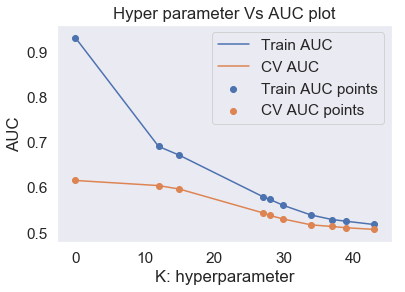

In [374]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

parameters = {'alpha': range(0,50)}#
neigh = MultinomialNB()# takes the alpha from the  i th list value    
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_set1_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

#results.head()

In [377]:
best_alpha = 11

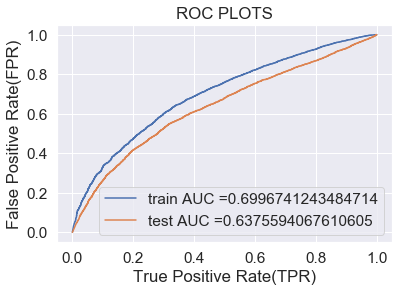

In [378]:
neigh =  MultinomialNB(alpha=best_alpha) 
neigh.fit(X_set1_train ,y_train) # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class # not the predicted outputs 
train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_set1_train)[:,1]) 
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_set1_test)[:,1]) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend() 
plt.xlabel("True Positive Rate(TPR)") 
plt.ylabel("False Positive Rate(FPR)") 
plt.title("ROC PLOTS") 
plt.show()
print("="*100)

In [379]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [438]:
'''print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))'''

'print("="*100)\nfrom sklearn.metrics import confusion_matrix\nbest_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)\nprint("Train confusion matrix")\nprint(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))\nprint("Test confusion matrix")\nprint(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))'

In [381]:
import pickle

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [382]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
print(avg_w2v_vectors_train[0])

100%|██████████████████████████████████████████████████████████████████████████| 15038/15038 [00:07<00:00, 2000.31it/s]


15038
300
[ 1.01462617e-02 -6.00055625e-03 -1.43572383e-02 -1.01298714e-01
 -3.00602891e-02  3.27918469e-02 -3.18758891e+00  9.01775430e-02
  1.92210125e-02 -3.97498750e-02  3.69419474e-02  1.11812939e-02
  1.24037342e-01 -3.72088125e-02 -4.87223281e-02  4.22964711e-02
  6.62812250e-02 -8.76224875e-02  1.11034186e-01  1.51456523e-02
  8.44976751e-02  1.63069586e-02 -1.62717109e-02  2.14857531e-02
 -8.17279637e-02 -4.60461109e-02  3.57229984e-02 -3.80566391e-02
 -5.05085891e-02 -6.56263055e-02 -2.28127296e-01 -9.89113086e-02
  1.00336648e-01  1.27110599e-01  1.18728633e-03 -6.01686672e-02
 -2.96263546e-02 -2.84552391e-02 -2.07792969e-02 -2.65047469e-02
 -1.14274588e-01  7.93046453e-02 -3.14728070e-02 -1.29838227e-01
 -3.26351563e-04 -4.74455867e-02  8.04292547e-02 -2.36165078e-02
  1.10553125e-03 -9.17203367e-02 -5.31611664e-02  2.51524281e-02
  1.82643125e-02 -8.46662422e-03  8.24963053e-02 -3.30834867e-02
  1.69835883e-01 -5.77786984e-02 -1.84396641e-02  1.37667961e-01
 -3.40112281e-0

In [383]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

100%|████████████████████████████████████████████████████████████████████████████| 7407/7407 [00:03<00:00, 1981.72it/s]


In [384]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1930.71it/s]


In [427]:
X_set1_train = hstack((scaled_x_train, X_train_essay_bow,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe, X_train_clean_ohe, X_train_price_norm)).tocsr()
X_set1_test = hstack((avg_w2v_vectors_test, X_test_essay_bow,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe, X_test_clean_ohe, X_test_price_norm)).tocsr()
X_set1_cv = hstack((avg_w2v_vectors_cv, X_cv_essay_bow,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe, X_cv_clean_ohe, X_cv_price_norm)).tocsr()

print("Final Data matrix")
print(X_set1_train.shape, y_train.shape)
print(X_set1_test.shape, y_test.shape)
print(X_set1_cv.shape, y_cv.shape)
print("="*100)

Final Data matrix
(15038, 7796) (15038,)
(16500, 7796) (16500,)
(7407, 7796) (7407,)


In [425]:
from sklearn import preprocessing

scaled = preprocessing.MinMaxScaler()
scaled_x_train = scaled.fit_transform(avg_w2v_vectors_train)

In [426]:
scaled_x_train

array([[0.49512779, 0.39869043, 0.56491944, ..., 0.60840074, 0.46685023,
        0.36951389],
       [0.47370788, 0.39101295, 0.56621807, ..., 0.6219031 , 0.63677253,
        0.58813362],
       [0.42440623, 0.64650605, 0.7132597 , ..., 0.47200474, 0.60773842,
        0.60172415],
       ...,
       [0.50984894, 0.59998406, 0.55132072, ..., 0.43576561, 0.52328791,
        0.31298968],
       [0.70744745, 0.38429728, 0.70163708, ..., 0.65205579, 0.4439634 ,
        0.45089913],
       [0.363942  , 0.64083597, 0.59414317, ..., 0.47346557, 0.45051298,
        0.62036891]])

C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\

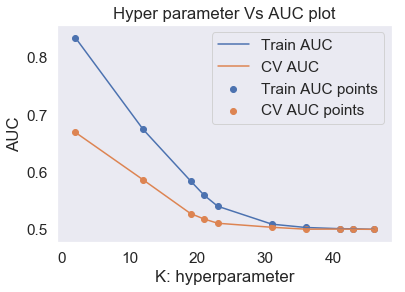

In [428]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

parameters = {'alpha': range(0,50)}#
neigh = MultinomialNB()# takes the alpha from the  i th list value    
clf = RandomizedSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_set1_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

#results.head()

# Testing the performance of the model on test data, plotting ROC Curves

In [429]:
best_alpha=11

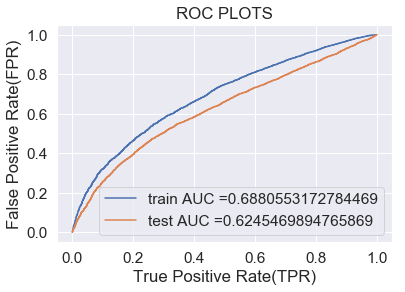

In [431]:
neigh =  MultinomialNB(alpha=best_alpha) 
neigh.fit(X_set1_train ,y_train) # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class # not the predicted outputs 
train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_set1_train)[:,1]) 
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_set1_test)[:,1]) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend() 
plt.xlabel("True Positive Rate(TPR)") 
plt.ylabel("False Positive Rate(FPR)") 
plt.title("ROC PLOTS") 
plt.show() 
print("="*100)

In [437]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5445633194942515 for threshold 0.46
Train confusion matrix
[[ 1736   673]
 [ 1852 10777]]
Test confusion matrix
[[ 1102  1540]
 [ 2522 11336]]


SET2 The hyper paramter tuning(find best alpha)

C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\

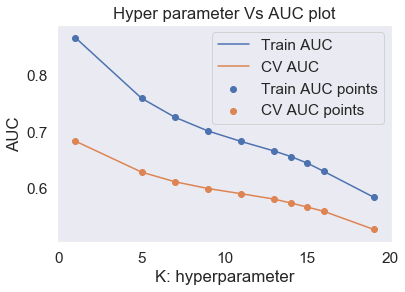

In [472]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

parameters = {'alpha': range(0,20)}#
neigh_set2 = MultinomialNB()# takes the alpha from the  i th list value    
clf = RandomizedSearchCV(neigh_set2, parameters, cv=3, scoring='roc_auc')
clf.fit(X_set2_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [450]:
best_alpha2 = 13

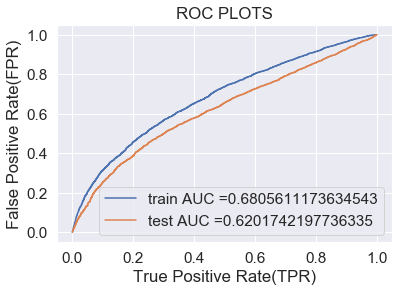

In [473]:
neigh_set2 =  MultinomialNB(alpha=best_alpha2) 
neigh_set2.fit(X_set1_train ,y_train) # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class # not the predicted outputs 
train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_set1_train)[:,1]) 
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_set1_test)[:,1]) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend() 
plt.xlabel("True Positive Rate(TPR)") 
plt.ylabel("False Positive Rate(FPR)") 
plt.title("ROC PLOTS") 
plt.show()
print("="*100)

In [452]:
import pickle

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [453]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
print(avg_w2v_vectors_train[0])

100%|██████████████████████████████████████████████████████████████████████████| 15038/15038 [00:07<00:00, 1887.58it/s]


15038
300
[ 1.01462617e-02 -6.00055625e-03 -1.43572383e-02 -1.01298714e-01
 -3.00602891e-02  3.27918469e-02 -3.18758891e+00  9.01775430e-02
  1.92210125e-02 -3.97498750e-02  3.69419474e-02  1.11812939e-02
  1.24037342e-01 -3.72088125e-02 -4.87223281e-02  4.22964711e-02
  6.62812250e-02 -8.76224875e-02  1.11034186e-01  1.51456523e-02
  8.44976751e-02  1.63069586e-02 -1.62717109e-02  2.14857531e-02
 -8.17279637e-02 -4.60461109e-02  3.57229984e-02 -3.80566391e-02
 -5.05085891e-02 -6.56263055e-02 -2.28127296e-01 -9.89113086e-02
  1.00336648e-01  1.27110599e-01  1.18728633e-03 -6.01686672e-02
 -2.96263546e-02 -2.84552391e-02 -2.07792969e-02 -2.65047469e-02
 -1.14274588e-01  7.93046453e-02 -3.14728070e-02 -1.29838227e-01
 -3.26351563e-04 -4.74455867e-02  8.04292547e-02 -2.36165078e-02
  1.10553125e-03 -9.17203367e-02 -5.31611664e-02  2.51524281e-02
  1.82643125e-02 -8.46662422e-03  8.24963053e-02 -3.30834867e-02
  1.69835883e-01 -5.77786984e-02 -1.84396641e-02  1.37667961e-01
 -3.40112281e-0

In [454]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

100%|████████████████████████████████████████████████████████████████████████████| 7407/7407 [00:03<00:00, 1918.72it/s]


In [455]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1896.04it/s]


In [456]:
X_set2_train = hstack((scaled_x_train, X_train_essay_bow,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe, X_train_clean_ohe, X_train_price_norm)).tocsr()
X_set2_test = hstack((avg_w2v_vectors_test, X_test_essay_bow,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe, X_test_clean_ohe, X_test_price_norm)).tocsr()
X_set2_cv = hstack((avg_w2v_vectors_cv, X_cv_essay_bow,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe, X_cv_clean_ohe, X_cv_price_norm)).tocsr()

print("Final Data matrix")
print(X_set2_train.shape, y_train.shape)
print(X_set2_test.shape, y_test.shape)
print(X_set2_cv.shape, y_cv.shape)
print("="*100)

Final Data matrix
(15038, 7796) (15038,)
(16500, 7796) (16500,)
(7407, 7796) (7407,)


In [457]:
from sklearn import preprocessing

scaled = preprocessing.MinMaxScaler()
scaled_x_train = scaled.fit_transform(avg_w2v_vectors_train)

C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Chance\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You ar

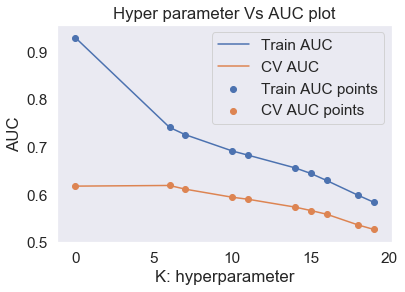

In [474]:
parameters = {'alpha': range(0,20)}#
neigh = MultinomialNB()# takes the alpha from the  i th list value    
clf = RandomizedSearchCV(neigh_set2, parameters, cv=3, scoring='roc_auc')
clf.fit(X_set2_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [460]:
best_alpha2 = 12

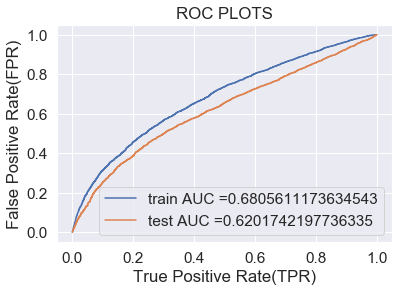

In [475]:
neigh_set2 =  MultinomialNB(alpha=best_alpha2) 
neigh_set2.fit(X_set2_train ,y_train) # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class # not the predicted outputs 
train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh_set2.predict_proba(X_set2_train)[:,1]) 
test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh_set2.predict_proba(X_set2_test)[:,1]) 
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr))) 
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend() 
plt.xlabel("True Positive Rate(TPR)") 
plt.ylabel("False Positive Rate(FPR)") 
plt.title("ROC PLOTS") 
plt.show()
print("="*100)

the maximum value of tpr*(1-fpr) 0.3982655902666055 for threshold 0.391
Train confusion matrix
[[ 1267  1142]
 [  788 11841]]
Test confusion matrix
[[  610  2032]
 [ 1134 12724]]
the maximum value of tpr*(1-fpr) 0.3982655902666055 for threshold 0.391


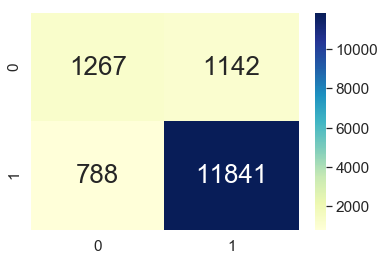

In [476]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

#train
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))



## Heatmaps -> https://likegeeks.com/seaborn-heatmap-tutorial/
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")



the maximum value of tpr*(1-fpr) 0.3982655902666055 for threshold 0.391


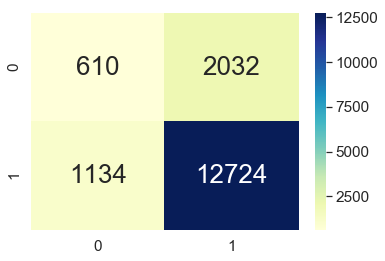

In [477]:
#test
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds,train_fpr, train_tpr)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

# Top 20 features

In [478]:
all_feature_names_bow=[]

In [482]:
## FOR SET 1 and SET 2
for i in vectorizer_clean.get_feature_names():
    all_feature_names_bow.append(i)   

for i in vectorizer_state.get_feature_names():
    all_feature_names_bow.append(i)    

for i in vectorizer_teacher.get_feature_names():
    all_feature_names_bow.append(i)   

for i in vectorizer_grade.get_feature_names():
    all_feature_names_bow.append(i)   
    
for i in vectorizer_essay_bow.get_feature_names():
    all_feature_names_bow.append(i)   

all_feature_names_bow.append("price")

all_feature_names_bow.append("prev_proj")

NameError: name 'vectorizer_clean' is not defined

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions